# importing required liaberaries

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,OrdinalEncoder
from sklearn.metrics import accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
data = pd.read_csv(r'C:\Users\acer\Desktop\Evaluation project\Automobile_insurance_fraud.csv')
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Checking Missing values

In [3]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [4]:
data['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [5]:
data.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [6]:
data['collision_type']=data['collision_type'].replace('?',np.NaN)

In [7]:
data['property_damage']=data['property_damage'].replace('?',np.NaN)

In [8]:
data['police_report_available']=data['police_report_available'].replace('?',np.NaN)

In [9]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# Dropping useless columns

In [10]:
data = data.drop('_c39',axis=1)

In [103]:
data = data.drop('policy_bind_date',axis=1)

# Checking data types

In [104]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

# Filling missing value

In [12]:
data['collision_type'].mode()

0    Rear Collision
dtype: object

In [13]:
data['collision_type']=data['collision_type'].fillna('Rear Collision')

In [14]:
data['property_damage'].mode()

0    NO
dtype: object

In [15]:
data['property_damage'] = data['property_damage'].fillna('NO')

In [16]:
data['police_report_available'].mode()

0    NO
dtype: object

In [17]:
data['police_report_available'] = data['police_report_available'].fillna('NO')

In [117]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [118]:
data

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Day
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,71610,6510,13020,52080,Saab,92x,2004,1,1,25
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,1,1,21
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,0,2,22
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,10,1
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,0,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,87200,17440,8720,61040,Honda,Accord,2006,0,2,22
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,108480,18080,18080,72320,Volkswagen,Passat,2015,0,1,24
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,67500,7500,7500,52500,Suburu,Impreza,1996,0,1,23
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,46980,5220,5220,36540,Audi,A5,1998,0,2,26


As per above observation total no. of rows = 1000 & total no. of columns = 39

# Checking columns

In [105]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'Month', 'Day'],
      dtype='object')

# map function

In [21]:
data['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [22]:
data['fraud_reported'] = data['fraud_reported'].map({'Y':1,'N':0})

# EDA

# age vs fraud_reported

<AxesSubplot:xlabel='age', ylabel='fraud_reported'>

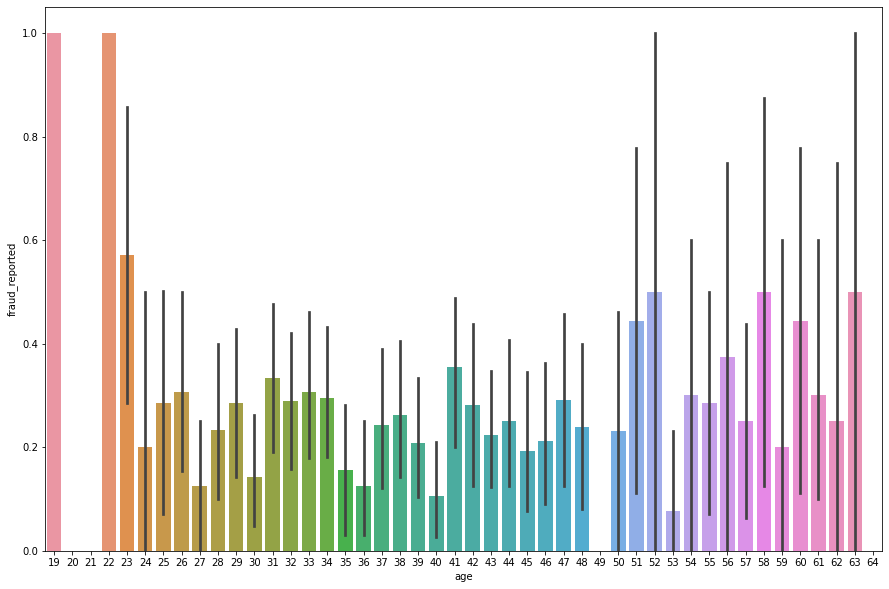

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(x='age',y='fraud_reported',data=data)

As per above observation, age 19 and 22 has maximum fraud reported.

# policy_state vs fraud_reported

<AxesSubplot:xlabel='policy_state', ylabel='fraud_reported'>

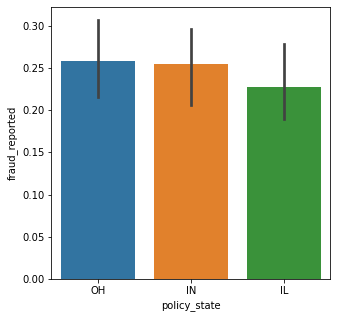

In [24]:
plt.figure(figsize=(5,5))
sns.barplot(x='policy_state',y='fraud_reported',data=data)

As per above observation, state like OH and IN has maximum fraud reported.

# police_report_available vs fraud_reported

<AxesSubplot:xlabel='police_report_available', ylabel='fraud_reported'>

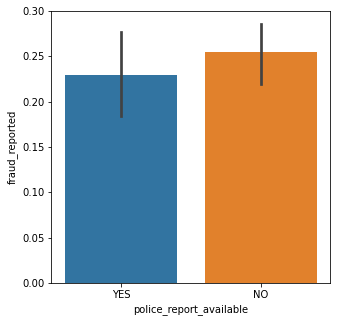

In [25]:
plt.figure(figsize=(5,5))
sns.barplot(x='police_report_available',y='fraud_reported',data=data)

As per above observation, police_report_available = NO has maximum fraud reported.

# insured_sex vs fraud_reported

<AxesSubplot:xlabel='insured_sex', ylabel='fraud_reported'>

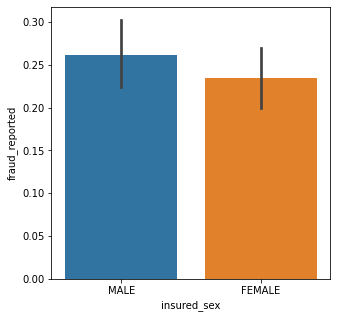

In [26]:
plt.figure(figsize=(5,5))
sns.barplot(x='insured_sex',y='fraud_reported',data=data)

As per above observation,insured_sex= MALE has maximum fraud reported.

# insured_education_level vs fraud_reported

<AxesSubplot:xlabel='insured_education_level', ylabel='fraud_reported'>

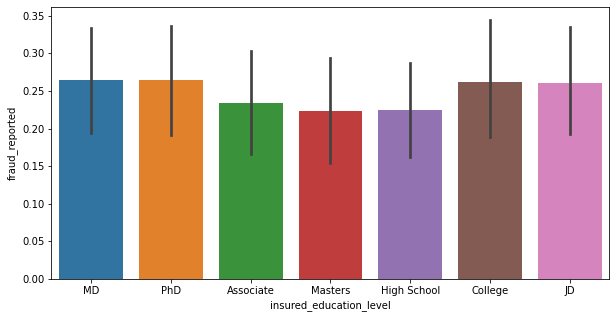

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(x='insured_education_level',y='fraud_reported',data=data)

As per above observation,insured_education_level like MD,Phd,College & JD has maximum fraud reported.

# insured_occupation vs fraud_reported

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

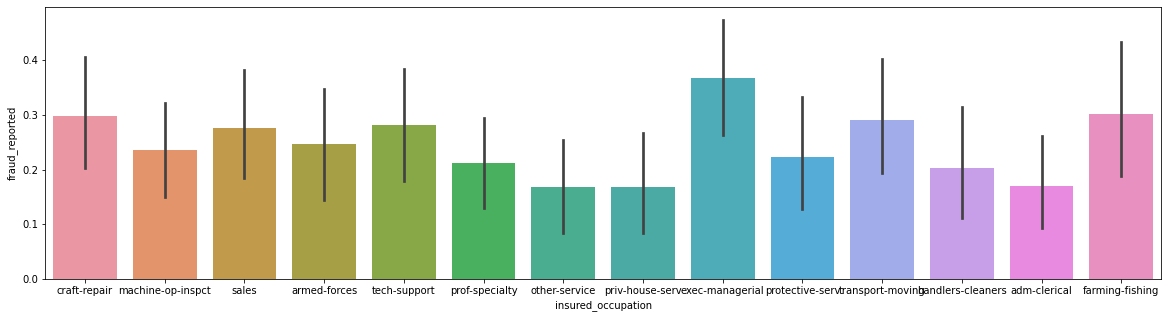

In [28]:
plt.figure(figsize=(20,5))
sns.barplot(x='insured_occupation',y='fraud_reported',data=data)
data['insured_occupation'].value_counts()

As per above observation, insured_occupation = exec-managerial has maximum fraud reported

# insured_hobbies vs fraud_reported

<AxesSubplot:xlabel='insured_hobbies', ylabel='fraud_reported'>

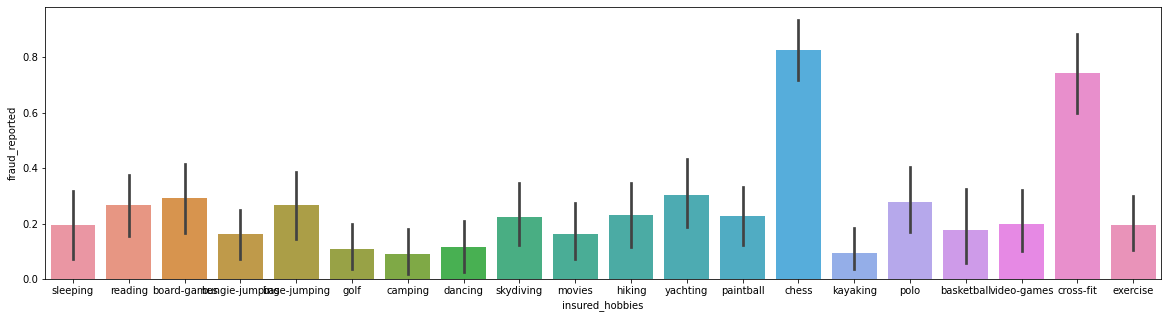

In [29]:
plt.figure(figsize=(20,5))
sns.barplot(x='insured_hobbies',y='fraud_reported',data=data)

As per above observation, insured_hobbies = chess & cross-fit has maximum fraud reported.

# insured_relationship vs fraud_reported

<AxesSubplot:xlabel='insured_relationship', ylabel='fraud_reported'>

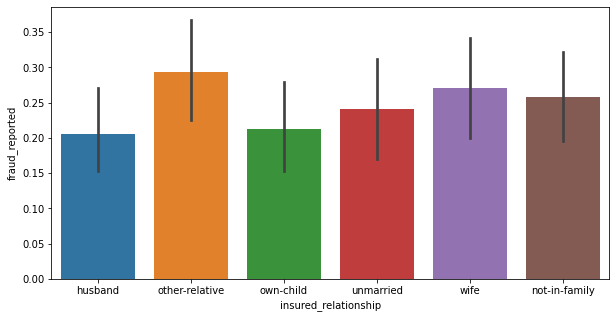

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x='insured_relationship',y='fraud_reported',data=data)

As per above observation, insured_relationship = other-relative & wife has maximum fraud reported.

# converting incident_date column  from object data type to datetime data type

In [31]:
data['incident_date'] = pd.to_datetime(data['incident_date'])

In [32]:
data['Month'] = data['incident_date'].dt.month

In [33]:
data['Year'] = data['incident_date'].dt.year

In [34]:
data['Day'] = data['incident_date'].dt.day

In [35]:
# Dropping incident_date column
data=data.drop('incident_date',axis=1)

In [36]:
# As Year column is giving usefull information hence dropping this column
data = data.drop('Year',axis=1)

# incident_date vs fraud_reported

# Checking maximum incident fraud reported days

<AxesSubplot:xlabel='Day', ylabel='fraud_reported'>

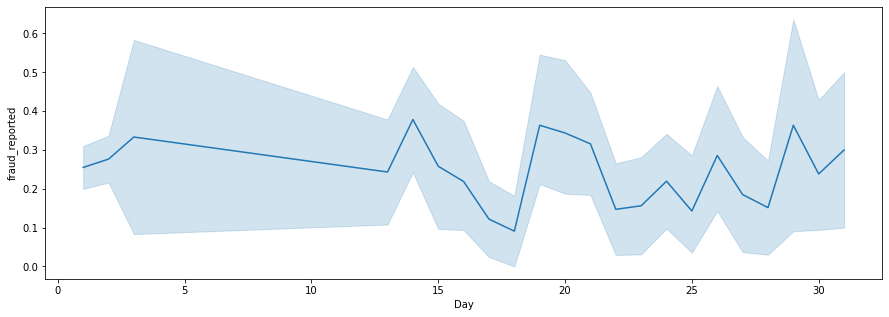

In [37]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Day',y='fraud_reported',data=data)

As per above observation, maximum incident fraud reported days = 3,14,19,27 & 29

# incident_date vs fraud_reported

# Checking maximum incident fraud reported Months

<AxesSubplot:xlabel='Month', ylabel='fraud_reported'>

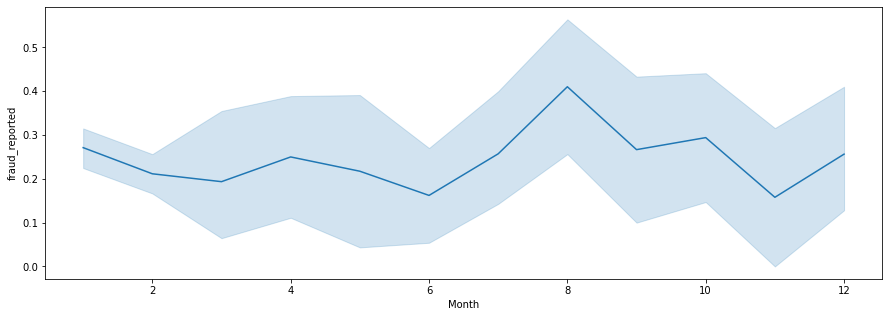

In [38]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Month',y='fraud_reported',data=data)

As per above observation,maximum incident fraud reported During August month  

# auto_make vs fraud_reported

<AxesSubplot:xlabel='auto_make', ylabel='fraud_reported'>

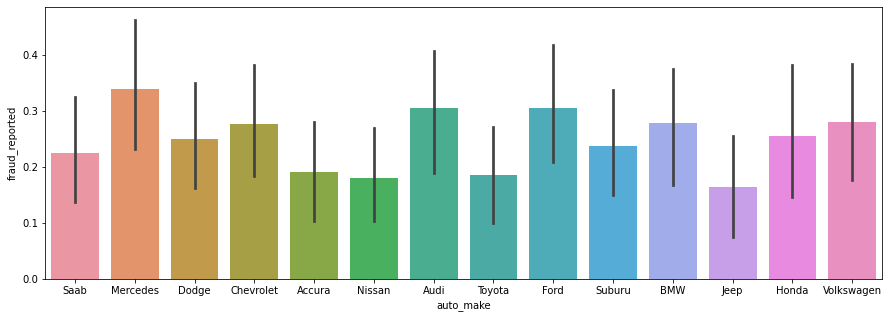

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(x='auto_make',y='fraud_reported',data=data)

As per above observation,cars like Mercedes,Audi,Ford,Volkswagen has maximum fraud reported.

# auto_model vs fraud_reported

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Camry             28
92x               28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Tahoe             24
Maxima            24
Escape            24
X5                23
Ultima            23
Highlander        22
Silverado         22
Civic             22
Fusion            21
Corolla           20
TL                20
ML350             20
CRV               20
Impreza           20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

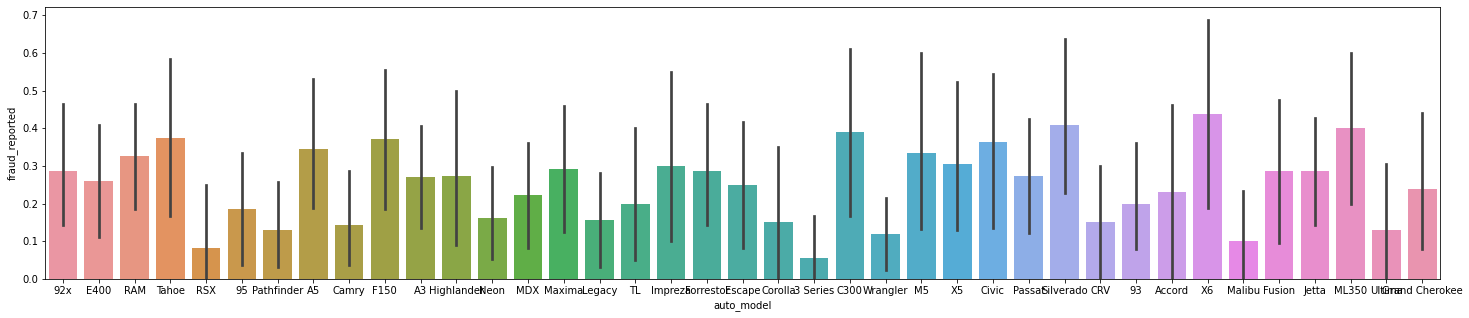

In [40]:
plt.figure(figsize=(25,5))
sns.barplot(x='auto_model',y='fraud_reported',data=data)
data['auto_model'].value_counts()

As per above observation,auto_model like Tahoe,F150,C300,Civic,Silverado,X6 & ML350 has maximum fraud reported.

# auto_year vs fraud_reported

<AxesSubplot:xlabel='auto_year', ylabel='fraud_reported'>

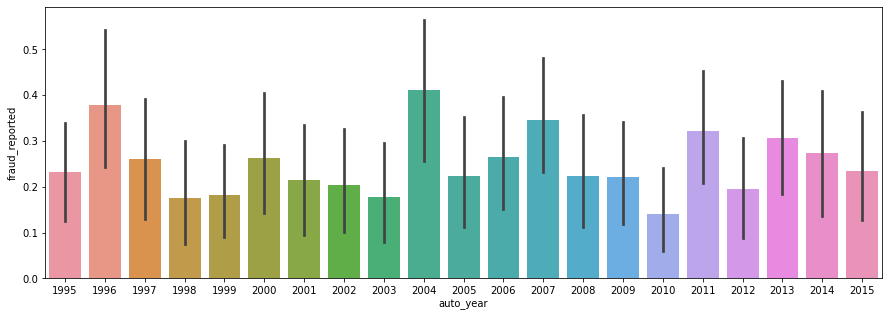

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(x='auto_year',y='fraud_reported',data=data)

As per above observation,auto_year=2004 has maximum fraud reported

# incident_type vs fraud_reported

<AxesSubplot:xlabel='incident_type', ylabel='fraud_reported'>

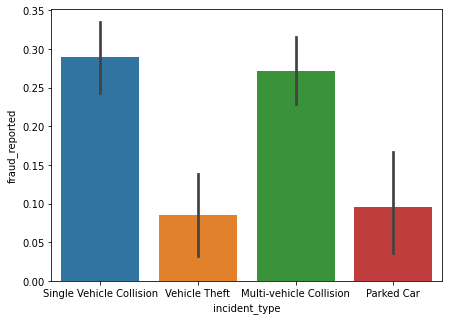

In [42]:
plt.figure(figsize=(7,5))
sns.barplot(x='incident_type',y='fraud_reported',data=data)

As per above observation,incident_type = Single vehicle collison & Multi-Vehicle Collision has maximum fraud reported.

# collision_type vs fraud_reported

<AxesSubplot:xlabel='collision_type', ylabel='fraud_reported'>

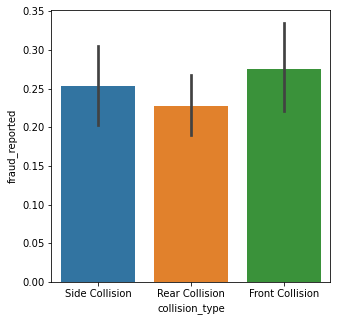

In [43]:
plt.figure(figsize=(5,5))
sns.barplot(x='collision_type',y='fraud_reported',data=data)

As per above observation, Front Collision has maximum fraud reported.

# incident_severity vs fraud_reported

<AxesSubplot:xlabel='incident_severity', ylabel='fraud_reported'>

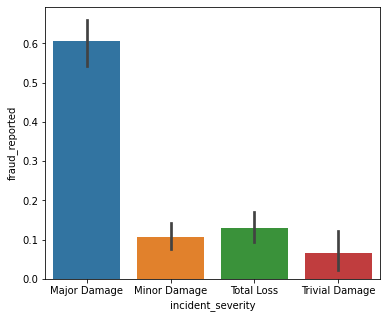

In [44]:
plt.figure(figsize=(6,5))
sns.barplot(x='incident_severity',y='fraud_reported',data=data)

As per above observation, Major Damage has maximum fraud reported.

# authorities_contacted vs fraud_reported

<AxesSubplot:xlabel='authorities_contacted', ylabel='fraud_reported'>

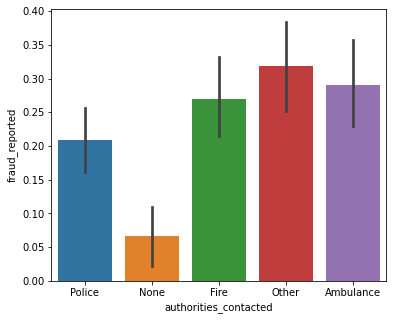

In [45]:
plt.figure(figsize=(6,5))
sns.barplot(x='authorities_contacted',y='fraud_reported',data=data)

As per above obsevation, authorities_contacted = Other has maximum fraud reported.

# incident_state vs fraud_reported

<AxesSubplot:xlabel='incident_state', ylabel='fraud_reported'>

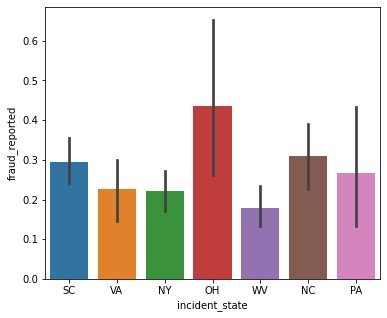

In [46]:
plt.figure(figsize=(6,5))
sns.barplot(x='incident_state',y='fraud_reported',data=data)

As per above observation, incident_state = OH has maximum fraud_reported

# incident_city vs fraud_reported

<AxesSubplot:xlabel='incident_city', ylabel='fraud_reported'>

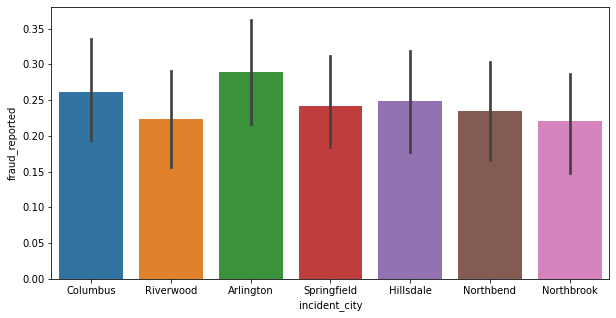

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(x='incident_city',y='fraud_reported',data=data)

As per aboe observation, incident_city = Arlington has maximum fraud reported

# incident_hour_of_the_day   vs   fraud_reported

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='fraud_reported'>

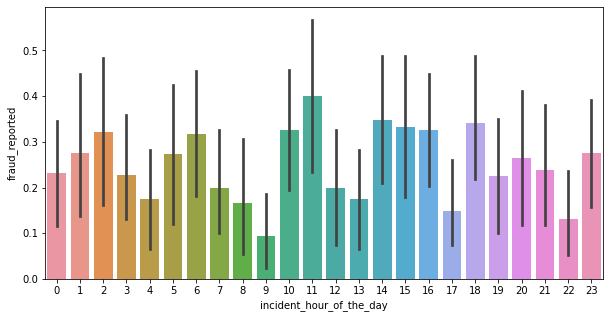

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(x='incident_hour_of_the_day',y='fraud_reported',data=data)

As per aboe observation, incident_hour_of_the_day = 11 has maximum fraud reported

# number_of_vehicles_involved  vs  fraud_reported

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='fraud_reported'>

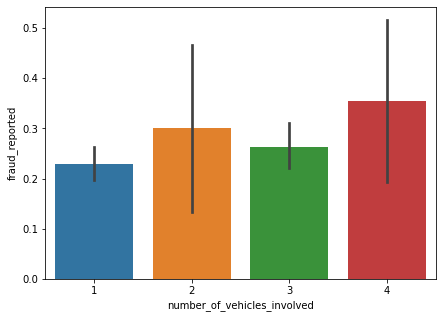

In [49]:
plt.figure(figsize=(7,5))
sns.barplot(x='number_of_vehicles_involved',y='fraud_reported',data=data)

As per aboe observation, number_of_vehicles_involved = 4 has maximum fraud reported

# property_damage vs fraud_reported

<AxesSubplot:xlabel='property_damage', ylabel='fraud_reported'>

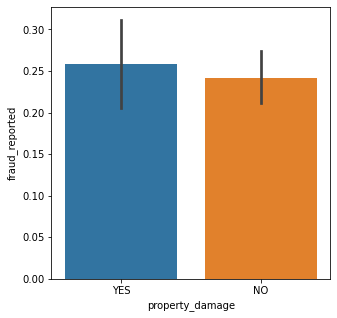

In [50]:
plt.figure(figsize=(5,5))
sns.barplot(x='property_damage',y='fraud_reported',data=data)

As per aboe observation, property_damage = YES has maximum fraud reported

# bodily_injuries vs fraud_reported

<AxesSubplot:xlabel='bodily_injuries', ylabel='fraud_reported'>

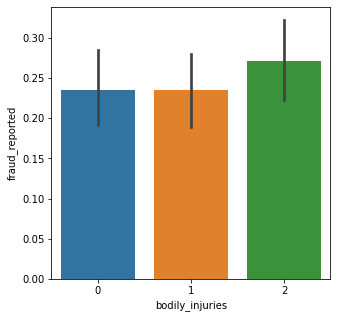

In [51]:
plt.figure(figsize=(5,5))
sns.barplot(x='bodily_injuries',y='fraud_reported',data=data)

As per aboe observation, bodily_injuries = 2 has maximum fraud reported

# Correlation

In [119]:
data.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,Month,Day
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,...,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544,0.024659,-0.011092
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,...,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143,0.023404,-0.006131
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,...,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,-0.029443,-0.042512,0.057199
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,...,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817,-0.006418,-0.018160
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,...,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480,0.021559,0.014835
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,...,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,0.058622,0.042409,-0.021716
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,...,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368,0.005461,0.019095
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,...,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173,0.029409,0.015418
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,...,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863,0.023216,-0.015035
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,...,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,0.004316,0.044827,-0.027965


<AxesSubplot:>

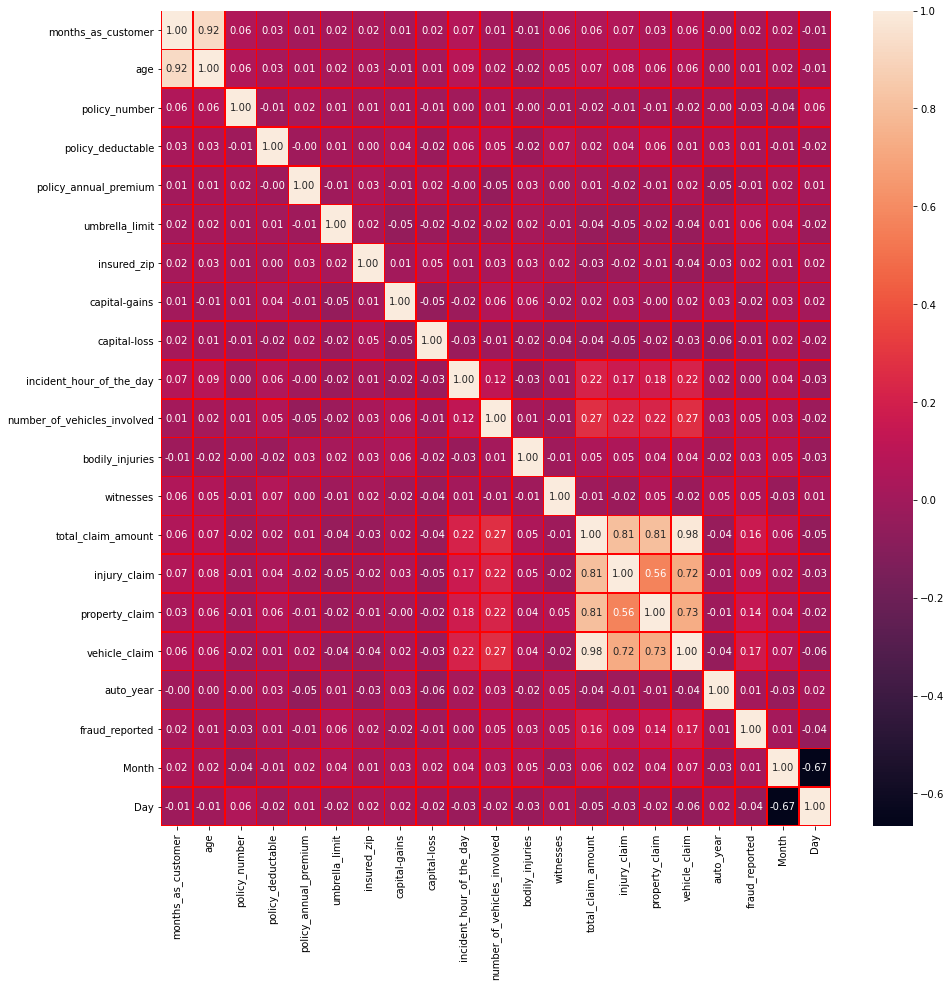

In [120]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,linecolor='r',linewidths=0.5,fmt='.2f')

Finding from the above observation are mentioned below:
    
1)months_as_customer has 2% positive correlation with Target column

2)age has 1% positive correlation with Target column

3)policy_number has 3% Negetive correlation with Target column

4)policy_deductable has 1% positive correlation with Target column

5)policy_annual_premium has 1% Negetive correlation with Target column

6)umbrella_limit has 6% positive correlation with Target column

7)insured_zip has 2% positive correlation with Target column

8)capital-gains has 2% Negetive correlation with Target column

9)capital-loss has 1% Negetive correlation with Target column

10)incident_hour_of_the_day has 0% positive correlation with Target column 

11)number_of_vehicles_involved has 5% positive correlation with Target column

12)bodily_injuries has 3% positive correlation with Target column

13)witnesses has 5% positive correlation with Target column

14)total_claim_amount has 16% positive correlation with Target column
 
15)injury_claim has 9% positive correlation with Target column

16)property_claim has 14% positive correlation with Target column

17)vehicle_claim has 17% positive correlation with Target column

18)auto_year has 1% positive correlation with Target column

19)Month has 1% positive correlation with Target column

20)Day has 4% Negetive correlation with Target column

# Checking Outliers on integer and float data type

<AxesSubplot:>

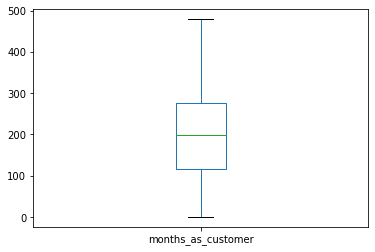

In [55]:
data['months_as_customer'].plot.box()

As per above observation, there is no outlier.

<AxesSubplot:>

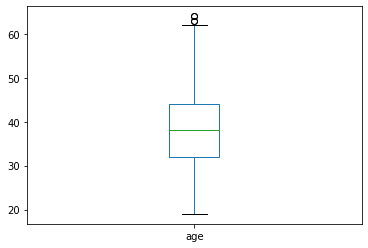

In [56]:
data['age'].plot.box()

As per above observation, there is an outlier.

<AxesSubplot:>

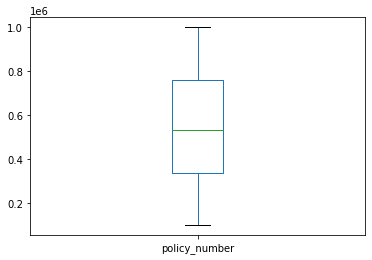

In [57]:
data['policy_number'].plot.box()

As per above observation, there is no outlier.

<AxesSubplot:>

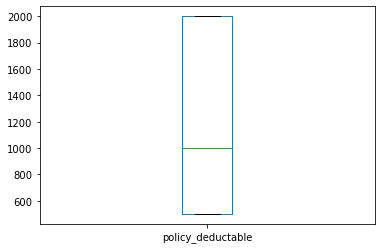

In [58]:
data['policy_deductable'].plot.box()

As per above observation, there is no outlier.

<AxesSubplot:>

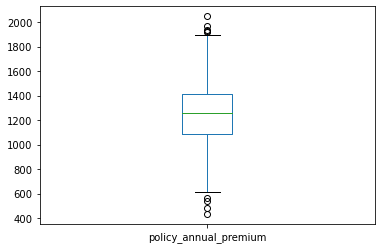

In [59]:
data['policy_annual_premium'].plot.box()

As per above observation, there is an outlier.

<AxesSubplot:>

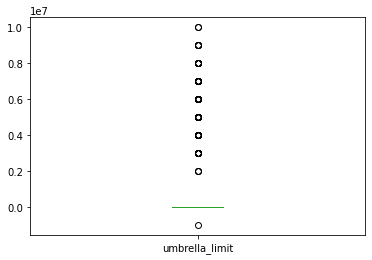

In [60]:
data['umbrella_limit'].plot.box()

As per above observation, there is an outlier.

<AxesSubplot:>

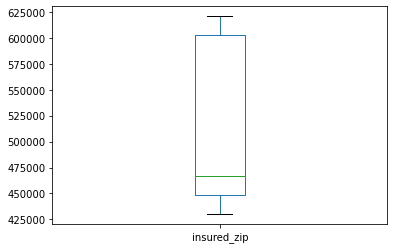

In [61]:
data['insured_zip'].plot.box()

As per above observation, there is no outlier.

<AxesSubplot:>

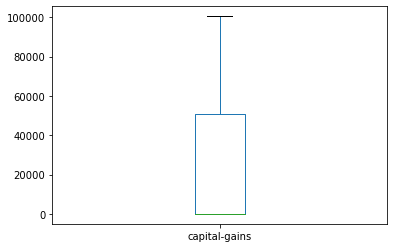

In [62]:
data['capital-gains'].plot.box()

As per above observation, there is no outlier.

<AxesSubplot:>

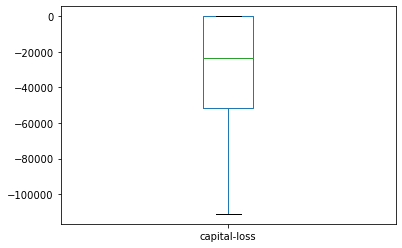

In [63]:
data['capital-loss'].plot.box()

As per above observation, there is no outlier.

<AxesSubplot:>

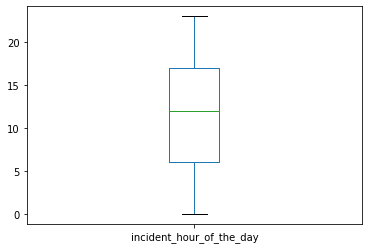

In [64]:
data['incident_hour_of_the_day'].plot.box()

As per above observation, there is no outlier.

<AxesSubplot:>

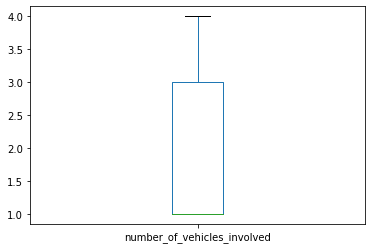

In [65]:
data['number_of_vehicles_involved'].plot.box()

As per above observation, there is no outlier.

<AxesSubplot:>

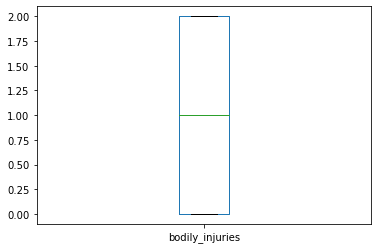

In [66]:
data['bodily_injuries'].plot.box()

As per above observation, there is no outlier.

<AxesSubplot:>

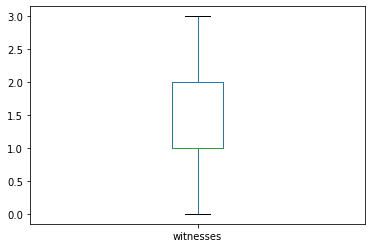

In [67]:
data['witnesses'].plot.box()

As per above observation, there is no outlier.

<AxesSubplot:>

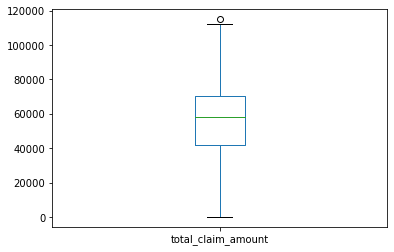

In [68]:
data['total_claim_amount'].plot.box()

As per above observation, there is no outlier.

<AxesSubplot:>

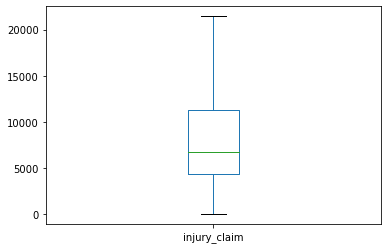

In [69]:
data['injury_claim'].plot.box()

As per above observation, there is no outlier.

<AxesSubplot:>

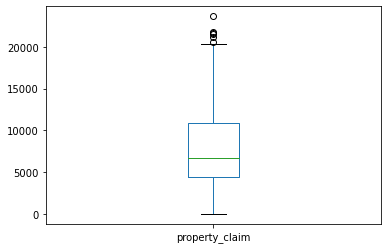

In [70]:
data['property_claim'].plot.box()

As per above observation, there is an outlier.

<AxesSubplot:>

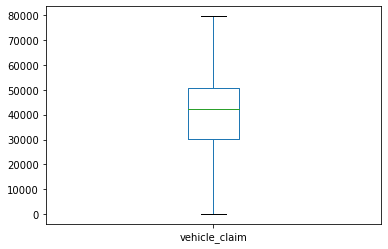

In [71]:
data['vehicle_claim'].plot.box()

As per above observation, there is no outlier.

<AxesSubplot:>

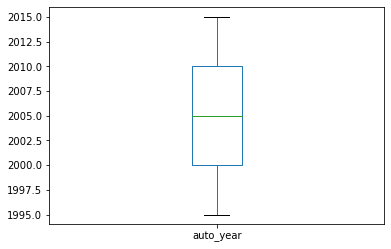

In [72]:
data['auto_year'].plot.box()

As per above observation, there is no outlier.

<AxesSubplot:>

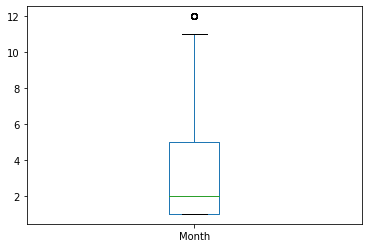

In [73]:
data['Month'].plot.box()

As per above observation, there is an outlier.

<AxesSubplot:>

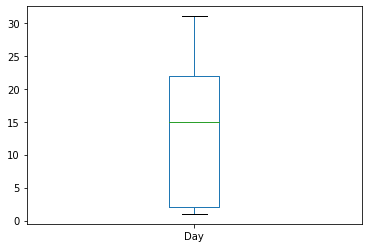

In [74]:
data['Day'].plot.box()

As per above observation, there is no outlier.

# Checking Skewness

In [75]:
data.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
Month                          1.375894
Day                            0.059111
dtype: float64

Findings skewed data from the above observation are mentioned below:

umbrella_limit -------                1.806712

insured_zip  -------                  0.816554

total_claim_amount  --------          -0.594582

vehicle_claim -------               -0.621098

Month   ----------                       1.375894

# Checking Normal Distribution

In [76]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,Month,Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,...,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000,3.407000,13.08400
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,...,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483,3.276291,10.44318
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000,1.000000,1.00000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,...,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000,1.000000,2.00000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000,2.000000,15.00000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000,5.000000,22.00000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,...,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000,12.000000,31.00000


<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

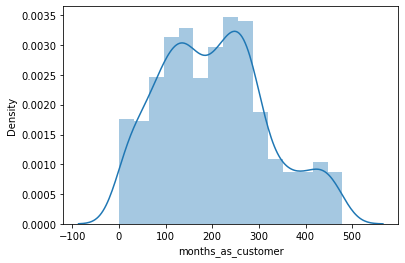

In [77]:
sns.distplot(data['months_as_customer'])

As per above observation,Normal distribution shows that data is skewed

<AxesSubplot:xlabel='age', ylabel='Density'>

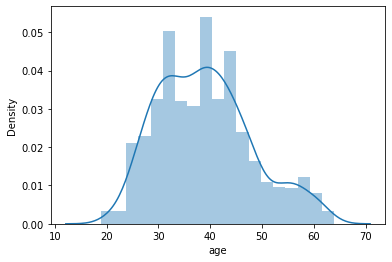

In [78]:
sns.distplot(data['age'])

As per above observation,Normal distribution shows that data is not skewed.

<AxesSubplot:xlabel='policy_number', ylabel='Density'>

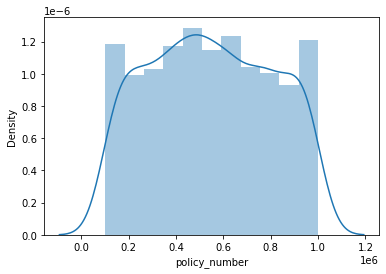

In [79]:
sns.distplot(data['policy_number'])

As per above observation,Normal distribution shows that data is skewed

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

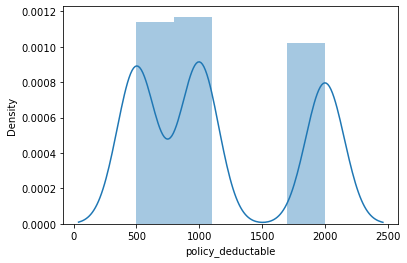

In [80]:
sns.distplot(data['policy_deductable'])

As per above observation,Normal distribution shows that data is skewed

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

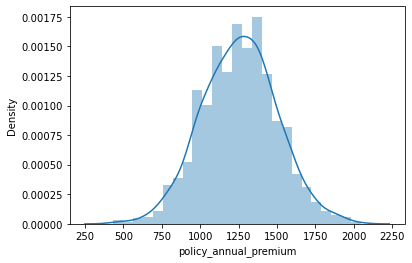

In [81]:
sns.distplot(data['policy_annual_premium'])

As per above observation,Normal distribution shows that data is not skewed

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

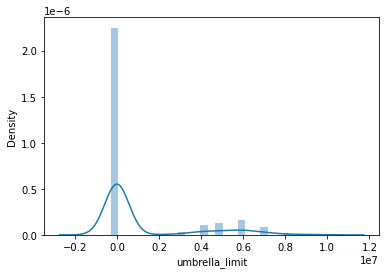

In [82]:
sns.distplot(data['umbrella_limit'])

As per above observation,Normal distribution shows that data is skewed

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

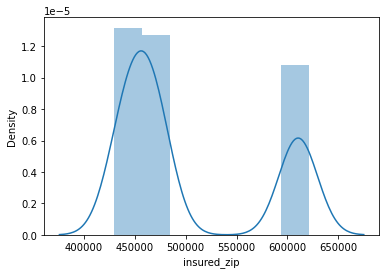

In [83]:
sns.distplot(data['insured_zip'])

As per above observation,Normal distribution shows that data is skewed

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

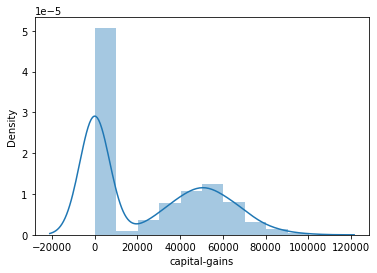

In [84]:
sns.distplot(data['capital-gains'])

As per above observation,Normal distribution shows that data is skewed

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

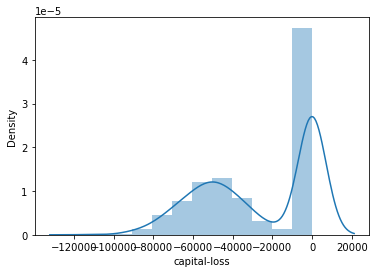

In [85]:
sns.distplot(data['capital-loss'])

As per above observation,Normal distribution shows that data is skewed

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

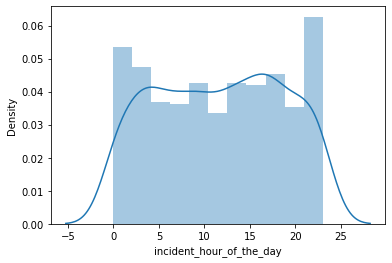

In [86]:
sns.distplot(data['incident_hour_of_the_day'])

As per above observation,Normal distribution shows that data is not skewed.

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Density'>

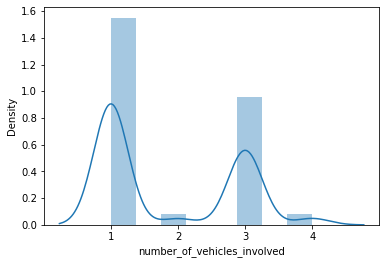

In [87]:
sns.distplot(data['number_of_vehicles_involved'])

As per above observation,Normal distribution shows that data is skewed

<AxesSubplot:xlabel='bodily_injuries', ylabel='Density'>

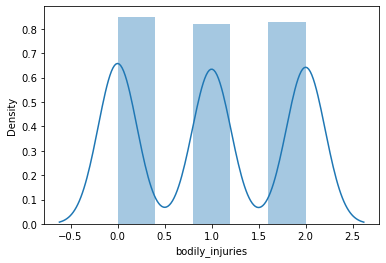

In [88]:
sns.distplot(data['bodily_injuries'])

As per above observation,Normal distribution shows that data is not skewed.

<AxesSubplot:xlabel='witnesses', ylabel='Density'>

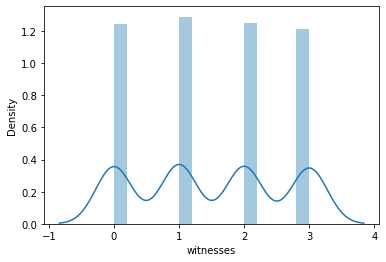

In [89]:
sns.distplot(data['witnesses'])

As per above observation,Normal distribution shows that data is not skewed

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

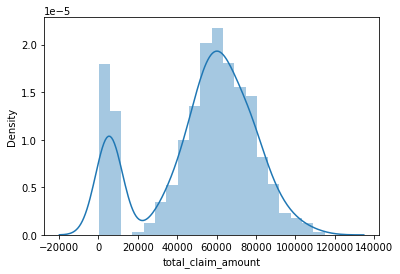

In [90]:
sns.distplot(data['total_claim_amount'])

As per above observation,Normal distribution shows that data is skewed

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

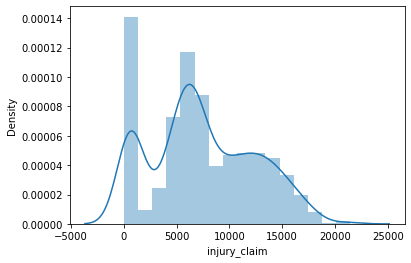

In [91]:
sns.distplot(data['injury_claim'])

As per above observation,Normal distribution shows that data is skewed

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

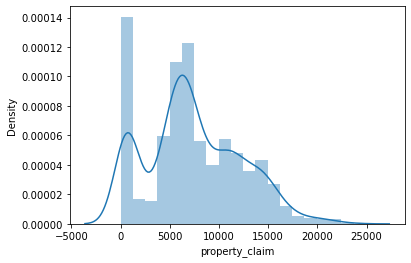

In [92]:
sns.distplot(data['property_claim'])

As per above observation,Normal distribution shows that data is skewed

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

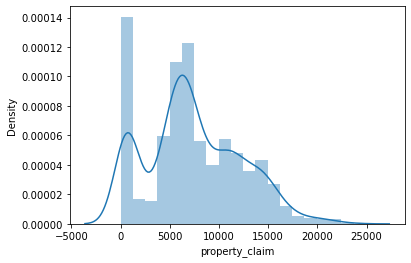

In [93]:
sns.distplot(data['property_claim'])

As per above observation,Normal distribution shows that data is skewed

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

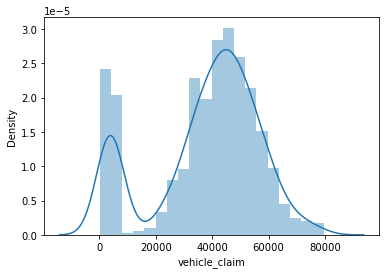

In [94]:
sns.distplot(data['vehicle_claim'])

As per above observation,Normal distribution shows that data is skewed

<AxesSubplot:xlabel='auto_year', ylabel='Density'>

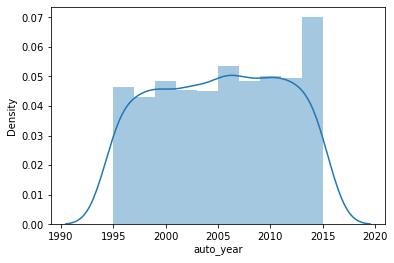

In [95]:
sns.distplot(data['auto_year'])

As per above observation,Normal distribution shows that data is skewed

<AxesSubplot:xlabel='Month', ylabel='Density'>

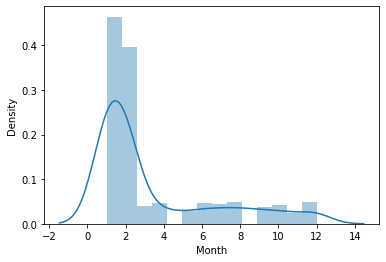

In [96]:
sns.distplot(data['Month'])

As per above observation,Normal distribution shows that data is skewed

<AxesSubplot:xlabel='Day', ylabel='Density'>

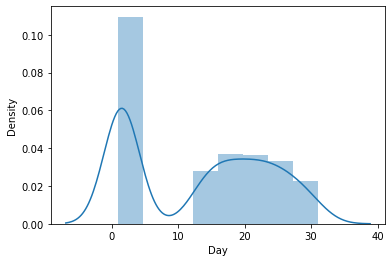

In [97]:
sns.distplot(data['Day'])

As per above observation,Normal distribution shows that data is skewed

In [98]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involv

# using Ordinal encoder to convert  categorical data type into Numerical data type

In [123]:
oe = OrdinalEncoder()

In [124]:
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=oe.fit_transform(data[i].values.reshape(-1,1))

In [125]:
data

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Day
0,328,48,521585,2.0,1.0,1000,1406.91,0,466132,1.0,...,71610,6510,13020,52080,10.0,1.0,2004,1,1,25
1,228,42,342868,1.0,1.0,2000,1197.22,5000000,468176,1.0,...,5070,780,780,3510,8.0,12.0,2007,1,1,21
2,134,29,687698,2.0,0.0,2000,1413.14,5000000,430632,0.0,...,34650,7700,3850,23100,4.0,30.0,2007,0,2,22
3,256,41,227811,0.0,1.0,2000,1415.74,6000000,608117,0.0,...,63400,6340,6340,50720,3.0,34.0,2014,1,10,1
4,228,44,367455,0.0,2.0,1000,1583.91,6000000,610706,1.0,...,6500,1300,650,4550,0.0,31.0,2009,0,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2.0,2.0,1000,1310.80,0,431289,0.0,...,87200,17440,8720,61040,6.0,6.0,2006,0,2,22
996,285,41,186934,0.0,0.0,1000,1436.79,0,608177,0.0,...,108480,18080,18080,72320,13.0,28.0,2015,0,1,24
997,130,34,918516,2.0,1.0,500,1383.49,3000000,442797,0.0,...,67500,7500,7500,52500,11.0,19.0,1996,0,1,23
998,458,62,533940,0.0,2.0,2000,1356.92,5000000,441714,1.0,...,46980,5220,5220,36540,1.0,5.0,1998,0,2,26


# Outlier removal

In [126]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z.shape

(1000, 39)

In [127]:
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int32), array([ 7,  7,  7,  7,  7,  6,  6,  7,  7,  7,  7, 31,  7,  7,  7,  6, 15,
        7,  7,  7], dtype=int32))


In [128]:
data_new = data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(1000, 39)
(980, 39)


# % of data loss after removing outliers

In [129]:
loss = (1000-980)/1000*100
print(loss)

2.0


As per above observation,lossing 2% of data

# Dividing dataset into features and vector where x = features , y = vector

In [130]:
x = data_new.drop('fraud_reported',axis=1)

In [131]:
y = data_new['fraud_reported']

# trying to get best random_state

In [132]:
maxAcc=0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = accuracy_score(pred,y_test)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy_score",maxAcc,"best random_state",maxRS)        

Best accuracy_score 0.8367346938775511 best random_state 68


In [133]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=68)

In [142]:
x_train

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Month,Day
193,19,32,882920,2.0,2.0,1000,1215.85,0,454985,1.0,...,1.0,7040,1280,640,5120,9.0,26.0,2015,2,1
267,35,29,818167,1.0,2.0,2000,653.66,0,475483,0.0,...,0.0,78300,15660,7830,54810,2.0,37.0,2009,2,24
806,45,37,798579,1.0,1.0,1000,1114.23,0,432534,1.0,...,1.0,52200,10440,5220,36540,9.0,29.0,2005,1,1
351,270,44,701521,0.0,2.0,2000,1030.95,0,435985,0.0,...,0.0,35900,7180,3590,25130,1.0,4.0,2007,3,2
633,142,29,890280,2.0,0.0,2000,1307.68,0,606942,0.0,...,0.0,54360,4530,9060,40770,8.0,12.0,1995,1,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,124,29,598124,2.0,2.0,500,1301.72,0,441726,1.0,...,1.0,72000,7200,7200,57600,1.0,4.0,2005,2,25
951,187,37,125591,1.0,2.0,1000,1412.06,5000000,450947,0.0,...,0.0,57700,5770,5770,46160,9.0,26.0,2000,1,16
433,143,34,847123,0.0,0.0,500,1442.27,0,435100,1.0,...,1.0,58500,11700,5850,40950,4.0,30.0,1999,2,17
511,283,48,963680,2.0,2.0,1000,1474.66,0,446755,0.0,...,0.0,6560,820,820,4920,13.0,20.0,2003,2,17


# Normalization of data

In [144]:
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [145]:
x_train

array([[0.03966597, 0.28888889, 0.87034166, ..., 1.        , 0.09090909,
        0.        ],
       [0.07306889, 0.22222222, 0.79828428, ..., 0.7       , 0.09090909,
        0.76666667],
       [0.09394572, 0.4       , 0.77648668, ..., 0.5       , 0.        ,
        0.        ],
       ...,
       [0.29853862, 0.33333333, 0.83050663, ..., 0.2       , 0.09090909,
        0.53333333],
       [0.5908142 , 0.64444444, 0.9602117 , ..., 0.4       , 0.09090909,
        0.53333333],
       [0.8914405 , 0.91111111, 0.94869863, ..., 0.45      , 0.09090909,
        0.63333333]])

# Logistic Regression

In [146]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pd = lr.predict(x_test)
print(classification_report(lr_pd,y_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       163
           1       0.45      0.45      0.45        33

    accuracy                           0.82       196
   macro avg       0.67      0.67      0.67       196
weighted avg       0.82      0.82      0.82       196



# Stochastic Gradient Descent

In [152]:
sgd = SGDClassifier()
sgd.fit(x_train,y_train)
sgd_pd = sgd.predict(x_test)
print(classification_report(sgd_pd,y_test))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       179
           1       0.24      0.47      0.32        17

    accuracy                           0.83       196
   macro avg       0.59      0.67      0.61       196
weighted avg       0.88      0.83      0.85       196



# Decision Tree Classifier

In [147]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pd = dt.predict(x_test)
print(classification_report(dt_pd,y_test))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       147
           1       0.67      0.45      0.54        49

    accuracy                           0.81       196
   macro avg       0.75      0.69      0.71       196
weighted avg       0.79      0.81      0.79       196



# Random Forest Classifier

In [148]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pd = rf.predict(x_test)
print(classification_report(rf_pd,y_test))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       157
           1       0.55      0.46      0.50        39

    accuracy                           0.82       196
   macro avg       0.71      0.68      0.69       196
weighted avg       0.81      0.82      0.81       196



# Support vector Machine

In [149]:
svm = SVC()
svm.fit(x_train,y_train)
svm_pd = svm.predict(x_test)
print(classification_report(svm_pd,y_test))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       189
           1       0.06      0.29      0.10         7

    accuracy                           0.82       196
   macro avg       0.51      0.56      0.50       196
weighted avg       0.94      0.82      0.87       196



# Checking cross_validation score

# Logistic Regression

In [153]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.7540816326530612


# Stochastic Gradient Descent

In [154]:
print(cross_val_score(sgd,x,y,cv=5).mean())

0.639795918367347


# Decision Tree Classifier

In [155]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.7724489795918368


# Random Forest Classifier

In [156]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.7836734693877551


# Support vector Machine

In [157]:
print(cross_val_score(svm,x,y,cv=5).mean())

0.7551020408163265


As per above observation,Random Forest Classifier is doing well because the difference between accuracy_score and cross_val_score is lesser than other model.Hence i will go with Random Forest Classifier.

# Hyper parameter tuning

In [159]:
Parameters = {'n_estimators':[500],
              'criterion':['gini','entropy'],
              'max_depth':np.arange(2,10),
              'min_samples_split':[1,2,3],
              'min_samples_leaf':[1,2,3],
              'max_features':['auto','sqrt','log2'],
              'random_state':[68]}

In [160]:
gsc=GridSearchCV(estimator=rf,param_grid=Parameters,cv=5)

In [161]:
gsc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3], 'n_estimators': [500],
                         'random_state': [68]})

# using best Parameters to build the model

In [162]:
gsc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500,
 'random_state': 68}

In [170]:
final_model = RandomForestClassifier(criterion='entropy',max_depth=8,max_features='auto',min_samples_leaf=3,min_samples_split=2,n_estimators=500,random_state=68)
final_model.fit(x_train,y_train)
final_model_pr = final_model.predict(x_test)
print(classification_report(final_model_pr,y_test))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       156
           1       0.58      0.47      0.52        40

    accuracy                           0.82       196
   macro avg       0.72      0.69      0.71       196
weighted avg       0.81      0.82      0.81       196



# Checking how model is performing

In [177]:
import numpy as np
a=np.array(y_test)
predicted = np.array(rf.predict(x_test))
df_com = pd.DataFrame({'Original':a,'predicted':predicted},index=range(len(a)))
df_com.head(50)

,Original,predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


As per above observation,my model is predicting 82% correctly.

# roc,auc curve

In [171]:
from sklearn.metrics import roc_curve,auc

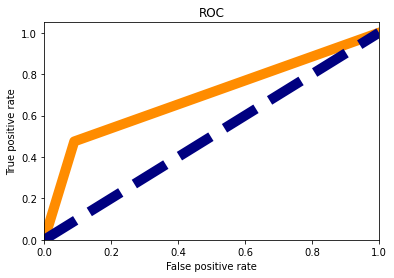

In [175]:
fpr,tpr,threshold=roc_curve(final_model_pr,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC_ CURVE(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.show()

# Save Model

In [178]:
import joblib
joblib.dump(final_model,"Final_insurance data_model")

['Final_insurance data_model']